In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime 

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [30]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [32]:
columns=inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [33]:
columns=inspector.get_columns('station')
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [35]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurements=Base.classes.measurement
Stations=Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [38]:
results = session.query(Measurements.id, Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs).\
    order_by(Measurements.date.desc()).all()
results[:10]

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [39]:
# Find the most recent date in the data set.
most_recent = [result[2] for result in results]
most_recent = most_recent[0]
most_recent

'2017-08-23'

In [40]:
compare_date = datetime.datetime.strptime(most_recent, '%Y-%m-%d') - datetime.timedelta(days=365)
compare_date = compare_date.strftime('%Y-%m-%d')
compare_date

'2016-08-23'

In [41]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
sel = [Measurements.date, func.avg(Measurements.prcp)]
yearly_precip = session.query(*sel).\
    filter(Measurements.date <= most_recent).\
    filter(Measurements.date >= compare_date).\
    group_by(Measurements.date).\
    order_by(Measurements.date.asc()).all()
yearly_precip[:10]

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006)]

In [42]:
# Convert your results into a pandas DataFrame with date as index.
df=pd.DataFrame(yearly_precip, columns=['Date', 'Precipitation'])
df.set_index("Date")
df.head()

,Date,Precipitation
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


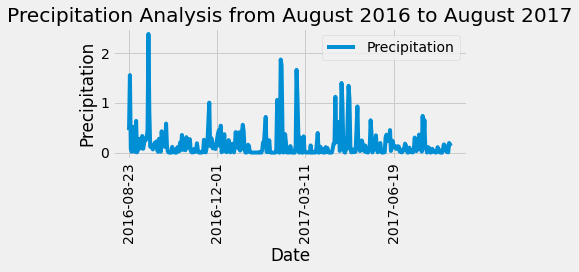

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('Date', 'Precipitation') 
plt.title('Precipitation Analysis from August 2016 to August 2017')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Resources/Precipitation.png")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [48]:
# Query total number of stations in dataset
station_results = session.query(Stations.id, Stations.station, Stations.name, Stations.latitude, Stations.longitude, Stations.elevation).\
    order_by(Stations.id).all()
#station_results
stations_total=len(station_results)
print(f"Total number of stations: {stations_total}")

Total number of stations: 9


In [49]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurements.station, func.count(Measurements.station)]
active_stations = session.query(*sel).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
for station_id, number in active_stations:
    print(f"Station {station_id} has {number} observations.")

Station USC00519281 has 2772 observations.
Station USC00519397 has 2724 observations.
Station USC00513117 has 2709 observations.
Station USC00519523 has 2669 observations.
Station USC00516128 has 2612 observations.
Station USC00514830 has 2202 observations.
Station USC00511918 has 1979 observations.
Station USC00517948 has 1372 observations.
Station USC00518838 has 511 observations.


In [53]:
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [54]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
sel = [Measurements.station, func.max(Measurements.tobs), func.min(Measurements.tobs), func.avg(Measurements.tobs)]
temps = session.query(*sel).\
    filter(Measurements.station == most_active_station).all()
#temps
for a,b,c,d in temps:
    station_id = a
    high_temp = b
    low_temp = c
    avg_temp = round(d,2)
print(f"The lowest temp for Station {station_id} was {low_temp} degrees.")
print(f"The highest temp for Station {station_id} was {high_temp} degrees.")
print(f"The average temp for Station {station_id} was {avg_temp} degrees.")

The lowest temp for Station USC00519281 was 54.0 degrees.
The highest temp for Station USC00519281 was 85.0 degrees.
The average temp for Station USC00519281 was 71.66 degrees.


In [55]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
sel = [Measurements.station, Measurements.date, Measurements.tobs]
year_temps = session.query(*sel).\
    filter(Measurements.date <= most_recent).\
    filter(Measurements.date >= compare_date).\
    filter(Measurements.station == most_active_station).\
    order_by(Measurements.date.asc()).all()
year_temps[:10]

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0)]

In [56]:
df1=pd.DataFrame(year_temps, columns=['Station', 'Date', 'Temperature'])
df1.head()

,Station,Date,Temperature
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


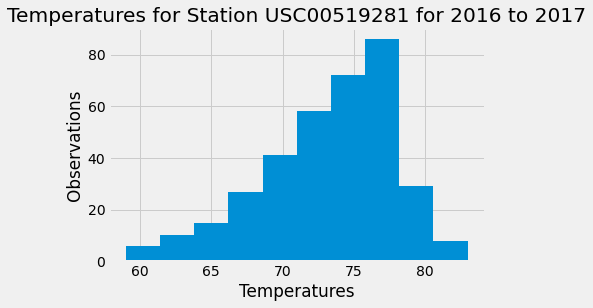

In [57]:
plt.hist(df1["Temperature"])
plt.xlabel("Temperatures")
plt.ylabel("Observations")
plt.title(f"Temperatures for Station {most_active_station} for 2016 to 2017")
plt.savefig("Resources/MostActiveStation.png")

# Close session

In [59]:
session.close()